In [86]:
 import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.dates as mdates
import time
import os

# PARAMS

In [87]:
epochs = 50
previous_days = 30
batch_size = 32
stock = 'PETR4'
days_to_predict = 30

In [88]:
sc = MinMaxScaler(feature_range=(0, 1))

In [89]:
start_time = time.time()

In [100]:
a = yf.download(f'{stock}.SA', start='2000-01-01', end=last_week_date.strftime('%Y-%m-%d'))
a

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,,
2000-01-03 00:00:00+00:00,1.384055,5.875000,5.875000,5.875000,5.875000,35389440000
2000-01-04 00:00:00+00:00,1.307490,5.550000,5.550000,5.550000,5.550000,28861440000
2000-01-05 00:00:00+00:00,1.294298,5.494000,5.494000,5.494000,5.494000,43033600000
2000-01-06 00:00:00+00:00,1.289822,5.475000,5.475000,5.475000,5.475000,34055680000
2000-01-07 00:00:00+00:00,1.295711,5.500000,5.500000,5.500000,5.500000,20912640000
...,...,...,...,...,...,...
2024-10-14 00:00:00+00:00,37.709999,37.709999,37.900002,37.349998,37.470001,22279000
2024-10-15 00:00:00+00:00,37.400002,37.400002,37.410000,37.060001,37.209999,28204600


In [101]:
b = yf.download(f'{stock}.SA', start=last_week_date.strftime('%Y-%m-%d'), end=datetime.now().strftime('%Y-%m-%d'))
b

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,,
2024-10-21 00:00:00+00:00,36.250000,36.250000,37.049999,36.200001,37.000000,28390000
2024-10-22 00:00:00+00:00,36.110001,36.110001,36.299999,35.990002,36.200001,29144300
2024-10-23 00:00:00+00:00,35.660000,35.660000,35.939999,35.570000,35.910000,30769100
2024-10-24 00:00:00+00:00,35.900002,35.900002,36.029999,35.560001,35.849998,23058900
2024-10-25 00:00:00+00:00,36.150002,36.150002,36.490002,35.849998,35.959999,32585900
2024-10-28 00:00:00+00:00,36.090000,36.090000,36.130001,35.340000,35.490002,27507100
2024-10-29 00:00:00+00:00,36.009998,36.009998,36.419998,35.799999,36.330002,26090200
2024-10-30 00:00:00+00:00,35.849998,35.849998,36.369999,35.849998,36.119999,26144700


In [90]:
last_week_date = datetime.now() - timedelta(days=days_to_predict)
dataset_train = yf.download(f'{stock}.SA', start='2000-01-01', end=last_week_date.strftime('%Y-%m-%d'))
dataset_test = yf.download(f'{stock}.SA', start=last_week_date.strftime('%Y-%m-%d'), end=datetime.now().strftime('%Y-%m-%d'))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[Timestamp('2024-10-21 00:00:00+0000', tz='UTC'),
 Timestamp('2024-10-22 00:00:00+0000', tz='UTC'),
 Timestamp('2024-10-23 00:00:00+0000', tz='UTC'),
 Timestamp('2024-10-24 00:00:00+0000', tz='UTC'),
 Timestamp('2024-10-25 00:00:00+0000', tz='UTC'),
 Timestamp('2024-10-28 00:00:00+0000', tz='UTC'),
 Timestamp('2024-10-29 00:00:00+0000', tz='UTC'),
 Timestamp('2024-10-30 00:00:00+0000', tz='UTC'),
 Timestamp('2024-10-31 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-01 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-04 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-05 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-06 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-07 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-08 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-11 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-12 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-13 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-14 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-18 00:00:00+0000', tz='UTC'),


In [91]:
dataset_train = dataset_train['Close'][f'{stock}.SA'].values.reshape(-1, 1)
dataset_train = dataset_train[~np.isnan(dataset_train)].reshape(-1, 1)

test_dates = dataset_test['Close'][f'{stock}.SA'].keys().to_list()

dataset_test = dataset_test['Close'][f'{stock}.SA'].values.reshape(-1, 1)
dataset_test = dataset_test[~np.isnan(dataset_test)]


In [92]:
training_set_scaled = sc.fit_transform(dataset_train)

In [93]:
X_train = []
y_train = []
for i in range(previous_days, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - previous_days:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

y_train = np.array(y_train)

In [94]:
regressor = Sequential()
regressor.add(Input(shape=(X_train.shape[1], 1)))

# Add the LSTM layer and Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [95]:
regressor.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0195
Epoch 2/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0027
Epoch 3/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0023
Epoch 4/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0020
Epoch 5/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0020
Epoch 6/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0016
Epoch 7/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015
Epoch 8/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0013
Epoch 9/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0013
Epoch 10/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0013
Epoch 11/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0012
Epoch 12/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0010
Epoch 13/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.4607e-04
Epoch 14/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0010
Epoch 15/50
194/194 ━━━━━━━━━━━━━━━━━━━

In [96]:
dataset_total = pd.concat(
    [pd.DataFrame(dataset_train), pd.DataFrame(dataset_test)], axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - previous_days:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(previous_days, previous_days + len(dataset_test)):
    X_test.append(inputs[i - previous_days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predictPrice = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


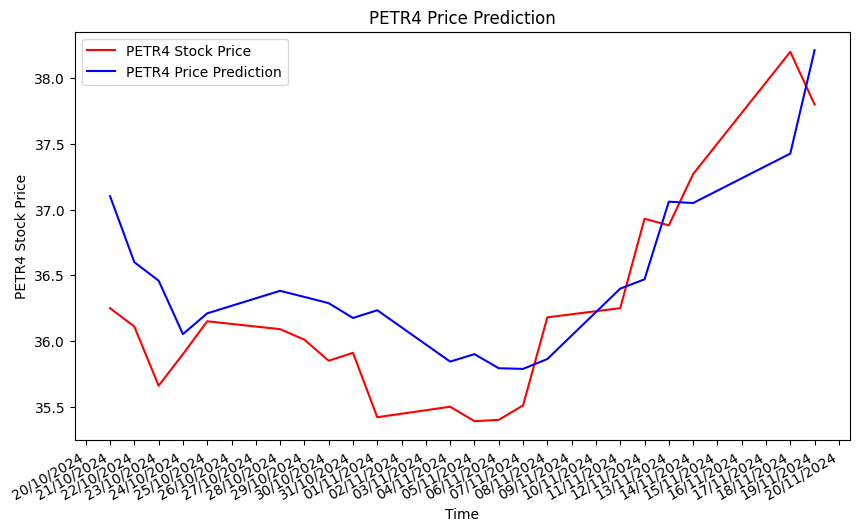

In [97]:
dates = pd.to_datetime(test_dates)

plt.figure(figsize=(10, 6))
plt.plot(dates, dataset_test, color='red', label=f'{stock} Stock Price')
plt.plot(dates, predictPrice, color='blue', label=f'{stock} Price Prediction')
plt.title(f'{stock} Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{stock} Stock Price')
plt.legend()

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels
folder_name = f'{batch_size}_{epochs}_{previous_days}'
os.mkdir(f'../Logs/Analysis/{folder_name}')
plt.savefig(f'../Logs/Analysis/{folder_name}/{stock}.png')

In [98]:
mae = mean_absolute_error(dataset_test, predictPrice)

# Calculando RMSE
rmse = np.sqrt(mean_squared_error(dataset_test, predictPrice))

# Calculando MAPE
mape = mean_absolute_percentage_error(dataset_test, predictPrice)

end_time = time.time()
time_lapsed = end_time - start_time

mins = time_lapsed // 60
sec = time_lapsed % 60
hours = mins // 60
mins = mins % 60

time_lapsed_message = "Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec)

print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec))

with open(f'../Logs/Analysis/{folder_name}/{stock}_evaluation.txt', 'w') as f:
    f.write(f'MAE: {mae}\n')
    f.write(f'RMSE: {rmse}\n')
    f.write(f'MAPE: {mape}\n')
    f.write(f'Time Lapsed {time_lapsed_message}\n')

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

Time Lapsed = 0:2:50.21211075782776
MAE: 0.4059203011648996
RMSE: 0.4650096487934881
MAPE: 0.01120855723843027


In [103]:
dates

DatetimeIndex(['2024-10-21 00:00:00+00:00', '2024-10-22 00:00:00+00:00',
               '2024-10-23 00:00:00+00:00', '2024-10-24 00:00:00+00:00',
               '2024-10-25 00:00:00+00:00', '2024-10-28 00:00:00+00:00',
               '2024-10-29 00:00:00+00:00', '2024-10-30 00:00:00+00:00',
               '2024-10-31 00:00:00+00:00', '2024-11-01 00:00:00+00:00',
               '2024-11-04 00:00:00+00:00', '2024-11-05 00:00:00+00:00',
               '2024-11-06 00:00:00+00:00', '2024-11-07 00:00:00+00:00',
               '2024-11-08 00:00:00+00:00', '2024-11-11 00:00:00+00:00',
               '2024-11-12 00:00:00+00:00', '2024-11-13 00:00:00+00:00',
               '2024-11-14 00:00:00+00:00', '2024-11-18 00:00:00+00:00',
               '2024-11-19 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)